In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as srn

In [3]:
dados = pd.read_csv('/dados.csv', sep=";")
dados 

,CODIGO,MUNICIPIO,PIB,VALOREMPENHO
0,106,SANTANA DO LIVRAMENTO,12240.76,1088666.10
1,113,SANTO ANGELO,16575.82,800669.92
2,118,SAO FRANCISCO DE ASSIS,12037.61,466122.80
3,13,CACAPAVA DO SUL,13674.54,485535.86
4,120,SAO GABRIEL,19912.38,533719.86
...,...,...,...,...
182,372,SANTA VITORIA DO PALMAR,27170.89,760.00
183,107,SANTA BARBARA DO SUL,29654.02,365.00
184,54,GETULIO VARGAS,16876.33,233.01
185,382,NOVA SANTA RITA,25938.38,310.58


In [4]:
dados.shape

(187, 4)

In [5]:
grupo_municipio = dados.groupby(['MUNICIPIO']).size()
grupo_municipio

MUNICIPIO
AGUDO                         1
AJURICABA                     1
ALECRIM                       1
ALMIRANTE TAMANDARE DO SUL    1
ALTO FELIZ                    1
                             ..
VERA CRUZ                     1
VIADUTOS                      1
VICTOR GRAEFF                 1
VILA MARIA                    1
VILA NOVA DO SUL              1
Length: 177, dtype: int64

In [12]:
#Descobrir quais cidades estão repetidas
iguais =dados.loc[dados.MUNICIPIO.duplicated(keep=False)]
iguais

,CODIGO,MUNICIPIO,PIB,VALOREMPENHO
18,259,CERRO BRANCO,11961.10,208240.50
19,259,MONTE ALEGRE DOS CAMPOS,11961.10,208240.50
21,259,CERRO BRANCO,12467.25,208240.50
22,259,MONTE ALEGRE DOS CAMPOS,12467.25,208240.50
41,141,DOUTOR MAURICIO CARDOSO,13628.17,147767.38
42,141,TAQUARA,13628.17,147767.38
57,141,DOUTOR MAURICIO CARDOSO,18628.78,147767.38
58,141,TAQUARA,18628.78,147767.38
82,378,MULITERNO,16581.60,97594.98
83,378,SANTO ANTONIO DAS MISSOES,16581.60,97594.98


In [ ]:
#Problema: Municipios repetidos com codigos iguais e dados diferentes

In [13]:
#Visualizar os dados da coluna CODIGO
dados.groupby(['CODIGO']).size()

CODIGO
1      1
7      1
9      1
13     1
14     1
      ..
486    1
487    1
490    1
491    1
496    1
Length: 172, dtype: int64

In [14]:
#Problema: Os códigos estão repetidos com dados diferentes
CodRepetidos = dados.loc[dados.CODIGO.duplicated(keep=False)]
CodRepetidos 

,CODIGO,MUNICIPIO,PIB,VALOREMPENHO
18,259,CERRO BRANCO,11961.10,208240.50
19,259,MONTE ALEGRE DOS CAMPOS,11961.10,208240.50
21,259,CERRO BRANCO,12467.25,208240.50
22,259,MONTE ALEGRE DOS CAMPOS,12467.25,208240.50
41,141,DOUTOR MAURICIO CARDOSO,13628.17,147767.38
42,141,TAQUARA,13628.17,147767.38
57,141,DOUTOR MAURICIO CARDOSO,18628.78,147767.38
58,141,TAQUARA,18628.78,147767.38
82,378,MULITERNO,16581.60,97594.98
83,378,SANTO ANTONIO DAS MISSOES,16581.60,97594.98


In [15]:
dados['VALOREMPENHO'].describe()

count    1.870000e+02
mean     1.299844e+05
std      1.615491e+05
min      1.721300e+02
25%      5.251718e+04
50%      8.422816e+04
75%      1.538961e+05
max      1.442760e+06
Name: VALOREMPENHO, dtype: float64

In [16]:
dados['PIB'].describe()

count       187.000000
mean      19808.741337
std       16984.223244
min        8236.630000
25%       13621.455000
50%       17206.190000
75%       21429.165000
max      223848.220000
Name: PIB, dtype: float64

In [17]:
dados.corr()

,CODIGO,PIB,VALOREMPENHO
CODIGO,1.000000,0.014142,-0.239193
PIB,0.014142,1.000000,0.484487
VALOREMPENHO,-0.239193,0.484487,1.000000


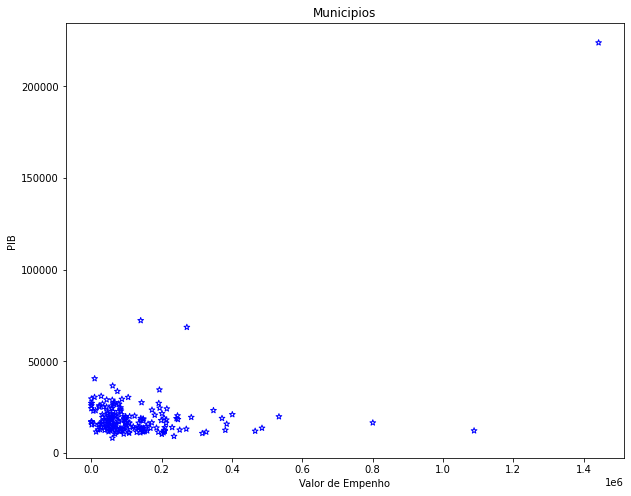

In [27]:
plt.figure(figsize=(10,8))
plt.scatter(x=dados.VALOREMPENHO, y=dados.PIB,color='blue', facecolors='none', marker="*")
plt.title('Municipios')
plt.xlabel('Valor de Empenho')
plt.ylabel('PIB')
plt.show()

[Text(0.5, 1.0, 'Valor de Empenho')]

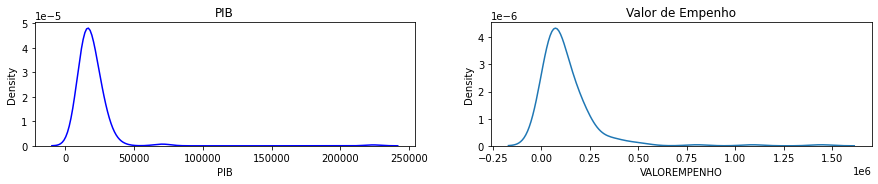

In [31]:
plt.figure(figsize=(15,5))
plt.subplot(2,2,1)
srn.kdeplot(dados.iloc[:,2], color="blue").set(title='PIB')
plt.subplot(2,2,2)
srn.kdeplot(dados.iloc[:,3]).set(title='Valor de Empenho')

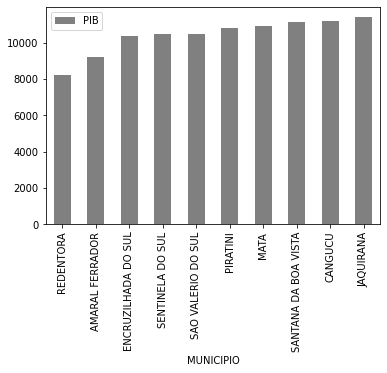

In [36]:
agrupado = dados.sort_values('PIB').head(10) #sort_values serve para ordenar o seu dataframe a partir de uma coluna.
agrupado = agrupado.iloc[:,1:3] #Coluna MUNICIPIO e PIB
agrupado.plot.bar(x='MUNICIPIO',y='PIB', color = 'gray')
plt.show()